# Predicting Early Alzheimer's Disease
## Dataset Summary

In [1]:
#Importing Dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#Displaying data
%matplotlib inline
data = pd.read_csv('C:/Users/Aoife Horgan/Documents/oasis_longitudinal.csv')
data.head(20)

,Subject ID,MRI ID,Group,Visit,MR Delay,Gender,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034
5,OAS2_0004,OAS2_0004_MR1,Nondemented,1,0,F,R,88,18,3.0,28.0,0.0,1215,0.710,1.444
6,OAS2_0004,OAS2_0004_MR2,Nondemented,2,538,F,R,90,18,3.0,27.0,0.0,1200,0.718,1.462
7,OAS2_0005,OAS2_0005_MR1,Nondemented,1,0,M,R,80,12,4.0,28.0,0.0,1689,0.712,1.039
8,OAS2_0005,OAS2_0005_MR2,Nondemented,2,1010,M,R,83,12,4.0,29.0,0.5,1701,0.711,1.032
9,OAS2_0005,OAS2_0005_MR3,Nondemented,3,1603,M,R,85,12,4.0,30.0,0.0,1699,0.705,1.033


In [13]:
#Describing each object in the dataset
data.select_dtypes(include = ['object']).describe()
data.select_dtypes(exclude = ['object']).describe()

,Visit,MR Delay,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
count,373.000000,373.000000,373.000000,373.000000,373.000000,371.000000,373.000000,373.000000,373.000000,373.000000
mean,1.882038,595.104558,77.013405,14.597855,2.479893,27.342318,0.290885,1488.128686,0.729568,1.195461
std,0.922843,635.485118,7.640957,2.876339,1.113335,3.683244,0.374557,176.139286,0.037135,0.138092
min,1.000000,0.000000,60.000000,6.000000,1.000000,4.000000,0.000000,1106.000000,0.644000,0.876000
25%,1.000000,0.000000,71.000000,12.000000,2.000000,27.000000,0.000000,1357.000000,0.700000,1.099000
50%,2.000000,552.000000,77.000000,15.000000,2.000000,29.000000,0.000000,1470.000000,0.729000,1.194000
75%,2.000000,873.000000,82.000000,16.000000,3.000000,30.000000,0.500000,1597.000000,0.756000,1.293000
max,5.000000,2639.000000,98.000000,23.000000,5.000000,30.000000,2.000000,2004.000000,0.837000,1.587000


In [2]:
#Number of patients in dataset
data.count()

Subject ID    373
MRI ID        373
Group         373
Visit         373
MR Delay      373
Gender        373
Hand          373
Age           373
EDUC          373
SES           354
MMSE          371
CDR           373
eTIV          373
nWBV          373
ASF           373
dtype: int64

In [3]:
#Minimum Age
data['Age'].min()

60

In [4]:
#Maximum Age
data['Age'].max()

98

In [5]:
#Number of females in dataset
females = pd.DataFrame(data['Gender']=='F')
f = females.sum()
(f/373)*100

Gender    57.104558
dtype: float64

In [6]:
#Number of males in dataset
males = pd.DataFrame(data['Gender']=='M')
m=males.sum()
(m/373)*100

Gender    42.895442
dtype: float64

In [7]:
#Counting number of patients within each group
group = pd.crosstab(index=data["Group"],columns="count")
group

col_0,count
Group,
Converted,37
Demented,146
Nondemented,190


## Data Pre-processing

In [8]:
#total number of missing values in dataset
data.isnull().values.any()
data.isnull().sum()

#percentage of missing values
ses = (data['SES'].isnull().sum())
mmse= (data['MMSE'].isnull().sum())
((mmse+ses)/373)*100

5.6300268096514747

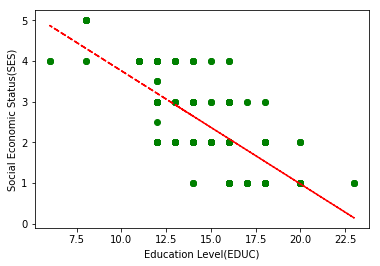

In [10]:
#Imputation
# Draw scatter plot between EDUC and SES
education = data['EDUC']
session = data['SES']

ses_not_null = session[~session.isnull()].index
x = education[ses_not_null]
y = session[ses_not_null]

# Draw trend line in red
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x, y, 'go', x, p(x), "r--")
plt.xlabel('Education Level(EDUC)')
plt.ylabel('Social Economic Status(SES)')

plt.show()

In [11]:
data.groupby(['EDUC'])['SES'].median()
data["SES"].fillna(data.groupby("EDUC")["SES"].transform("median"), inplace=True)
pd.isnull(data['SES']).value_counts()

False    373
Name: SES, dtype: int64

In [12]:
#Removing MMSE null values
drop = data['MMSE'].dropna(axis=0, how='any')
pd.isnull(drop).sum()

0

## Pre-analytics (Data Exploration)

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5]),
 <a list of 10 Text xticklabel objects>)

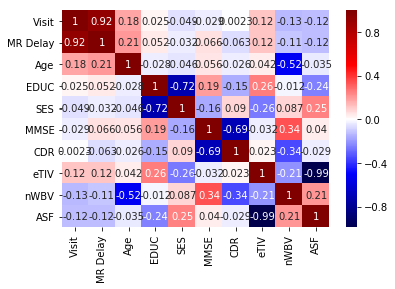

In [14]:
#Correaltion between variables
cm = data.corr()
import seaborn as sns
sns.heatmap(data=cm, annot=True, cmap='seismic')
plt.yticks(rotation=0)
plt.xticks(rotation=90)

In [15]:
#Mean, Min,Max SD of columns
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
data.drop(['MR Delay'], axis=1)
col = data.groupby(['Group','Gender'])
col.aggregate({np.mean,np.sum,np.min,np.max})

Visit                     MR Delay                          \
                    amax amin  sum      mean     amax amin    sum        mean   
Group       Gender                                                              
Converted   F          4    1   45  1.875000     2002    0  16465  686.041667   
            M          5    1   30  2.307692     2639    0  12092  930.153846   
Demented    F          3    1   96  1.600000     1655    0  22484  374.733333   
            M          5    1  157  1.825581     2508    0  43587  506.825581   
Nondemented F          5    1  248  1.922481     2517    0  82184  637.085271   
            M          5    1  126  2.065574     2400    0  45162  740.360656   

                    Age                       EDUC                        SES  \
                   amax amin   sum       mean amax amin   sum       mean amax   
Group       Gender                                                              
Converted   F        92   65  1878  78.250000   18   12   342  14.250000  4.0   
            M        89   77  1073  82.538462   20   16   230  17.692308  2.0   
Demented    F        98   66  4626  77.100000   18    8   770  12.833333  5.0   
            M        92   61  6508  75.674419   20    6  1226  14.255814  4.0   
Nondemented F        97   60  9953  77.155039   23    8  1950  15.116279  5.0   
            M        92   60  4688  76.852459   20   11   927  15.196721  4.0   

                                          MMSE                           CDR  \
                   amin    sum      mean  amax  amin     sum       mean amax   
Group       Gender                                                             
Converted   F       1.0   48.0  2.000000  30.0  24.0   682.0  28.416667  0.5   
            M       1.0   16.0  1.230769  30.0  26.0   379.0  29.153846  0.5   
Demented    F       1.0  182.5  3.041667  30.0  15.0  1421.0  24.500000  2.0   
            M       1.0  223.5  2.598837  30.0   4.0  2109.0  24.523256  2.0   
Nondemented F       1.0  307.0  2.379845  30.0  27.0  3779.0  29.294574  0.0   
            M       1.0  148.0  2.426230  30.0  26.0  1774.0  29.081967  0.5   

                                         eTIV                             \
                   amin   sum      mean  amax  amin     sum         mean   
Group       Gender                                                         
Converted   F       0.0   5.5  0.229167  1529  1264   33284  1386.833333   
            M       0.0   4.0  0.307692  1722  1398   20709  1593.000000   
Demented    F       0.5  42.5  0.708333  1732  1143   82828  1380.466667   
            M       0.5  55.5  0.645349  1957  1307  134106  1559.372093   
Nondemented F       0.0   0.0  0.000000  1744  1106  182267  1412.922481   
            M       0.0   1.0  0.016393  2004  1362  101878  1670.131148   

                     nWBV                             ASF                  \
                     amax   amin     sum      mean   amax   amin      sum   
Group       Gender                                                          
Converted   F       0.799  0.683  17.704  0.737667  1.388  1.147   30.464   
            M       0.729  0.666   9.074  0.698000  1.255  1.019   14.395   
Demented    F       0.777  0.652  43.227  0.720450  1.535  1.013   76.913   
            M       0.806  0.646  61.353  0.713407  1.342  0.897   97.833   
Nondemented F       0.822  0.644  96.176  0.745550  1.587  1.006  161.555   
            M       0.837  0.663  44.595  0.731066  1.289  0.876   64.747   

                              
                        mean  
Group       Gender            
Converted   F       1.269333  
            M       1.107308  
Demented    F       1.281883  
            M       1.137593  
Nondemented F       1.252364  
            M       1.061426

In [16]:
#Bar Graph
data = data.loc[data['Visit']==1] # use first visit data only because of the analysis we're doing
data = data.reset_index(drop=True) # reset index after filtering first visit data
data['Gender'] = data['Gender'].replace(['F','M'], [0,1]) # M/F column
data['Group'] = data['Group'].replace(['Converted'], ['Demented']) # Target variable
data['Group'] = data['Group'].replace(['Demented', 'Nondemented'], [1,0]) # Target variable
data = data.drop(['MRI ID', 'Visit', 'Hand'], axis=1) # Drop unnecessary columns

In [17]:
# bar drawing function
def bar(feature):
    Demented = data[data['Group']==1][feature].value_counts()
    Nondemented = data[data['Group']==0][feature].value_counts()
    df_bar = pd.DataFrame([Demented,Nondemented])
    df_bar.index = ['Demented','Nondemented']
    df_bar.plot(kind='bar',stacked=True, figsize=(10,10))

Text(0.5,1,'Gender and Demented rate')

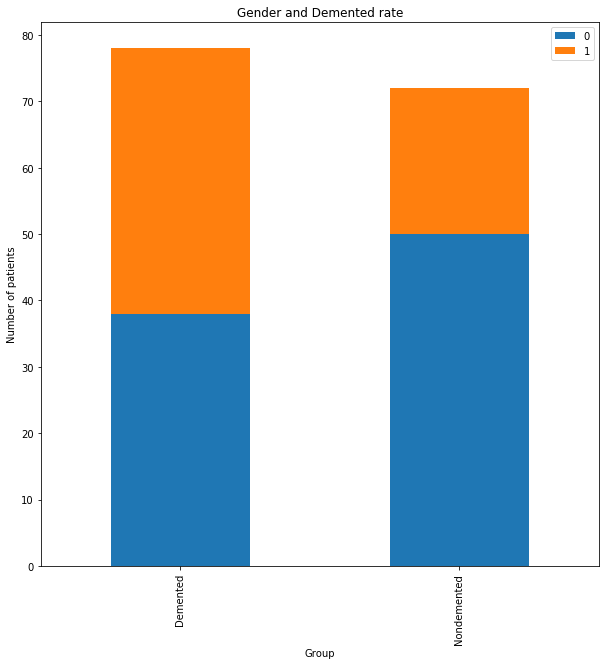

In [18]:
#output bar graph
bar('Gender')
plt.xlabel('Group')
plt.ylabel('Number of patients')
plt.legend()
plt.title('Gender and Demented rate')

(15.3, 30.0)

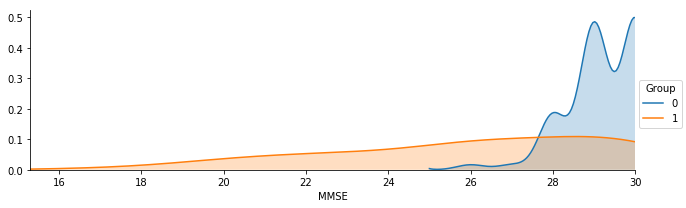

In [19]:
#MMSE : Mini Mental State Examination
# Nondemented = 0, Demented =1
f= sns.FacetGrid(data,hue="Group", aspect=3)
f.map(sns.kdeplot,'MMSE',shade= True)
f.set(xlim=(0, data['MMSE'].max()))
f.add_legend()
plt.xlim(15.30)

(15.3, 23.0)

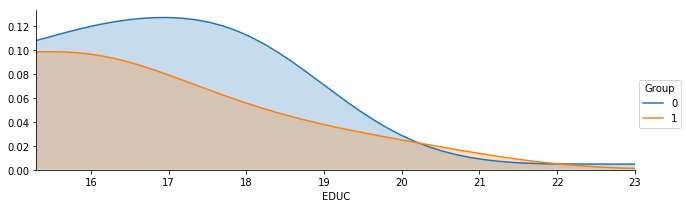

In [20]:
#EDUC: Years of Education
# Nondemented = 0, Demented =1
f= sns.FacetGrid(data,hue="Group", aspect=3)
f.map(sns.kdeplot,'EDUC',shade= True)
f.set(xlim=(0, data['EDUC'].max()))
f.add_legend()
plt.xlim(15.30)

(50, 100)

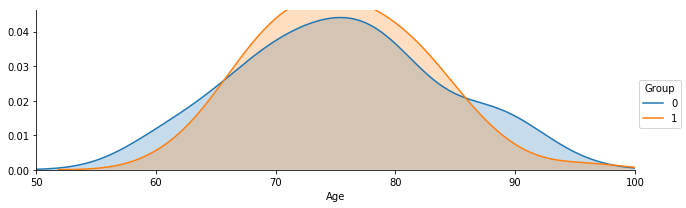

In [21]:
#Age with Group
# Nondemented = 0, Demented =1
facet= sns.FacetGrid(data,hue="Group", aspect=3)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, data['Age'].max()))
facet.add_legend()
plt.xlim(50,100)

(5.3, 5.0)

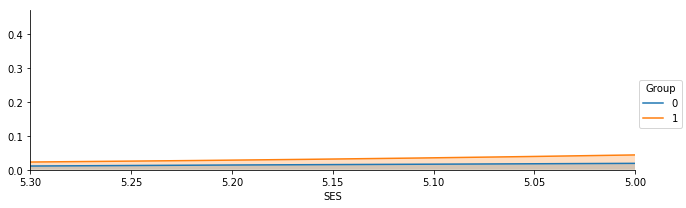

In [22]:
#Socio Economic Background with Group
# Nondemented = 0, Demented =1
fa= sns.FacetGrid(data,hue="Group", aspect=3)
fa.map(sns.kdeplot,'SES',shade= True)
fa.set(xlim=(0, data['SES'].max()))
fa.add_legend()
plt.xlim(5.30)

(50, 100)

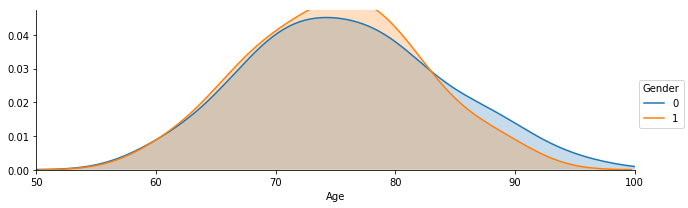

In [23]:
#Age with Gender
# M = 0, F =1
fa= sns.FacetGrid(data,hue="Gender", aspect=3)
fa.map(sns.kdeplot,'Age',shade= True)
fa.set(xlim=(0, data['Age'].max()))
fa.add_legend()
plt.xlim(50,100)

(0.5, 0.8)

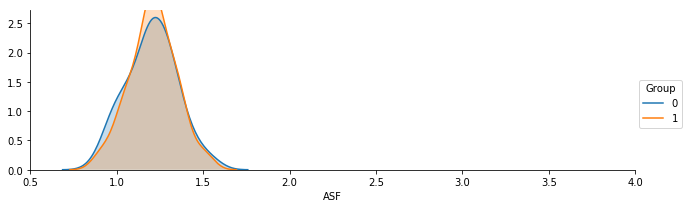

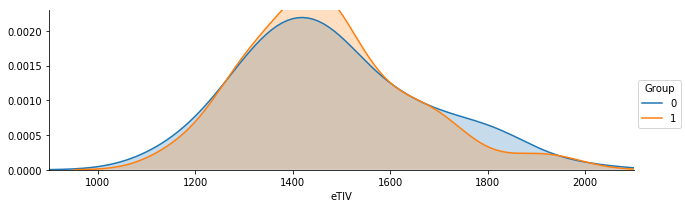

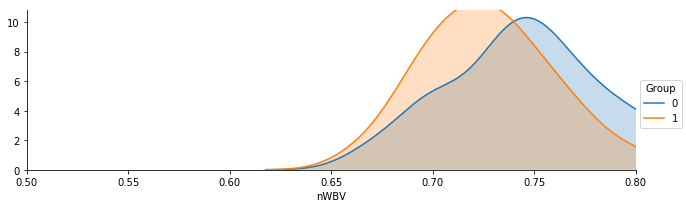

In [24]:
#Brain Volume
facet= sns.FacetGrid(data,hue="Group", aspect=3)
facet.map(sns.kdeplot,'ASF',shade= True)
facet.set(xlim=(0, data['ASF'].max()))
facet.add_legend()
plt.xlim(0.5, 4)

facet= sns.FacetGrid(data,hue="Group", aspect=3)
facet.map(sns.kdeplot,'eTIV',shade= True)
facet.set(xlim=(0, data['eTIV'].max()))
facet.add_legend()
plt.xlim(900, 2100)

facet= sns.FacetGrid(data,hue="Group", aspect=3)
facet.map(sns.kdeplot,'nWBV',shade= True)
facet.set(xlim=(0, data['nWBV'].max()))
facet.add_legend()
plt.xlim(0.5, 0.8)

## Predictive Modelling

### Splitting Dataset

In [197]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler 
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, roc_curve, auc
Y = data['Gender'].values # Target for the model
X = data[['Group', 'Age', 'EDUC', 'SES', 'MMSE', 'eTIV', 'nWBV', 'ASF']] # Features we use

X_trainval, X_test, Y_trainval, Y_test = train_test_split(
    X, Y,test_size=0.35, random_state=99)

# Feature scaling
#scaler = MinMaxScaler().fit(X_trainval)
#X_trainval_scaled = scaler.transform(X_trainval)
#X_test_scaled = scaler.transform(X_test)

In [84]:
print("{0:0.2f}% for Training".format((len(X_trainval)/len(data.index)) * 100))
print("{0:0.2f}% for Tests".format((len(X_test)/len(data.index)) * 100))

64.67% for Training
35.33% for Tests


In [139]:
print("Original Demented : {0} ({1:0.2f}%)".format(len(data.loc[data['Group'] == 1]), 100 * (len(data.loc[data['Group'] == 1]) / len(data))))
print("Original Nondemented : {0} ({1:0.2f}%)".format(len(data.loc[data['Group'] == 0]), 100 * (len(data.loc[data['Group'] == 0]) / len(data))))
print("")
print("Training Demented : {0} ({1:0.2f}%)".format(len(Y_trainval[Y_trainval[:] == 1]), 100 * (len(Y_trainval[Y_trainval[:] == 1]) / len(Y_trainval))))
print("Training Nondemented : {0} ({1:0.2f}%)".format(len(Y_trainval[Y_trainval[:] == 0]), 100 * (len(Y_trainval[Y_trainval[:] == 0]) / len(Y_trainval))))
print("")
print("Testing Demented : {0} ({1:0.2f}%)".format(len(Y_test[Y_test[:] == 1]), 100 * (len(Y_test[Y_test[:] == 1]) / len(Y_test))))
print("Test Nondemented : {0} ({1:0.2f}%)".format(len(Y_test[Y_test[:] == 0]), 100 * (len(Y_test[Y_test[:] == 0]) / len(Y_test))))

Original Demented : 78 (52.00%)
Original Nondemented : 72 (48.00%)

Training Demented : 50 (51.55%)
Training Nondemented : 47 (48.45%)

Testing Demented : 28 (52.83%)
Test Nondemented : 25 (47.17%)


### Decision Tree Classification

In [198]:
from sklearn import tree
from sklearn import svm, datasets
#kfolds=5
#for md in range(1, 9): # iterate different maximum depth values
    # train the model
treeModel = tree.DecisionTreeClassifier(random_state=99, min_samples_split=20, criterion='gini')
treeModel.fit(X_trainval, Y_trainval)
y_predict = treeModel.predict(X_test)

from sklearn.metrics import accuracy_score

accuracy_score(Y_test, y_predict) ##accruacy score

from sklearn.metrics import confusion_matrix


#calculating classification accruacy score
print(metrics.accuracy_score(Y_test, y_predict))

#calculating null accruacy score
max(Y_test.mean(), 1 - Y_test.mean())

pd.DataFrame(
    confusion_matrix(Y_test, y_predict),
    columns=['Predicted: 0', 'Predicted: 1'],
    index=['Actual: 0', 'Actual: 1']
)
    # perform cross-validation
    #scores = cross_val_score(treeModel, X_trainval_scaled, Y_trainval, cv=kfolds, scoring='accuracy')
     # compute mean cross-validation accuracy
   # score = np.mean(scores)
    # if we got a better score, store the score and parameters
    #if score > best_score:
        #best_score = score
       # best_parameter = md

#test_score = SelectedDTModel.score(X_test_scaled, Y_test)
#PredictedOutput = SelectedDTModel.predict(X_test_scaled)
#test_recall = recall_score(Y_test, PredictedOutput, pos_label=1)
#fpr, tpr, thresholds = roc_curve(Y_test, PredictedOutput, pos_label=1)
#test_auc = auc(fpr, tpr)
#print("Best accuracy on validation set is:", score)
#print("Best parameter for the maximum depth is: ", best_parameter)
#print("Test accuracy with best parameter is ", test_score)
#print("Test recall with best parameters is ", test_recall)
#print("Test AUC with the best parameter is ", test_auc)


0.698113207547


,Predicted: 0,Predicted: 1
Actual: 0,27,6
Actual: 1,10,10


In [153]:
print("Feature importance: ")
importances = treeModel.feature_importances_
indices = np.argsort(importances)
features = X_trainval.columns.values
np.array([X.columns.values.tolist(), list(treeModel.feature_importances_)]).T

Feature importance: 


array([['Gender', '0.0661212046536'],
       ['Age', '0.0647717923137'],
       ['EDUC', '0.0'],
       ['SES', '0.0451249912225'],
       ['MMSE', '0.488074961327'],
       ['eTIV', '0.175112962339'],
       ['nWBV', '0.107567440807'],
       ['ASF', '0.0532266473368']],
      dtype='<U15')

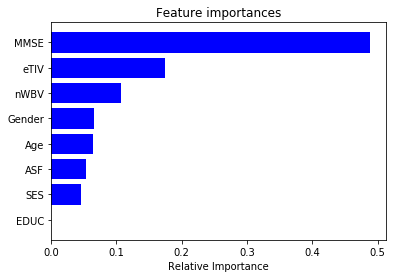

In [154]:
plt.figure()
plt.title("Feature importances")
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')
plt.show()

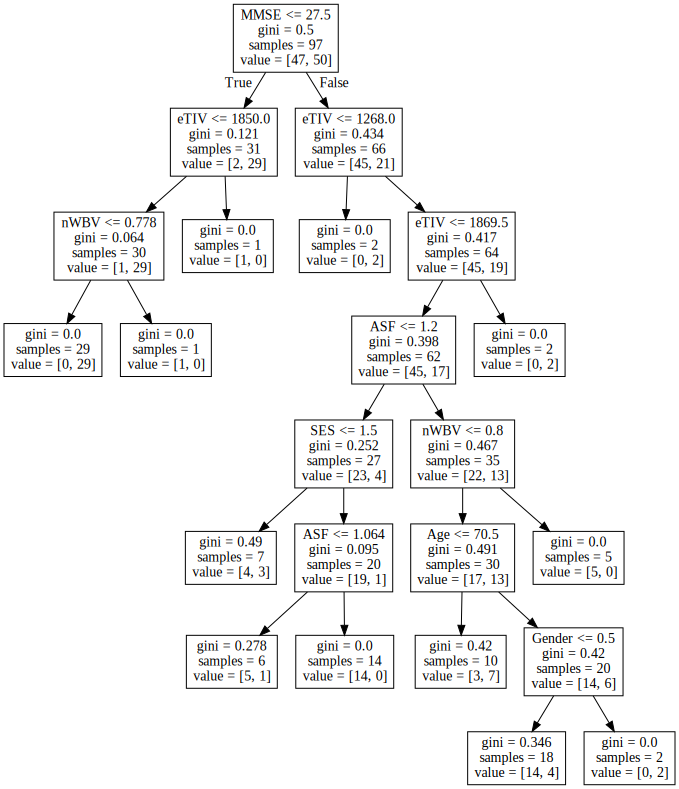

In [183]:
from sklearn.tree import export_graphviz
import graphviz 
dot_data = export_graphviz(treeModel, feature_names=X_trainval.columns.values.tolist(),out_file=None)
graph = graphviz.Source(dot_data) 
graph

## Random Forest Classification

In [190]:
# Import the model we are using
from sklearn.ensemble import RandomForestClassifier
rModel = RandomForestClassifier(n_estimators=1000, random_state=99).fit(X_trainval, Y_trainval)
pred = rModel.predict(X_test)
rModel.score(X_test, Y_test)

#calculating null accruacy score
max(Y_test.mean(), 1 - Y_test.mean())

0.52830188679245282

In [193]:
print("Feature importance: ")
im = rModel.feature_importances_
ind = np.argsort(im)
f = X_trainval.columns.values
np.array([X.columns.values.tolist(), list(rModel.feature_importances_)]).T


Feature importance: 


array([['Gender', '0.0215795252023'],
       ['Age', '0.131734383578'],
       ['EDUC', '0.0696657350579'],
       ['SES', '0.0584254450579'],
       ['MMSE', '0.25144531989'],
       ['eTIV', '0.142185624189'],
       ['nWBV', '0.183802268398'],
       ['ASF', '0.141161698628']],
      dtype='<U15')

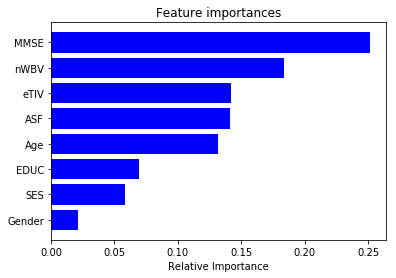

In [194]:
plt.figure()
plt.title("Feature importances")
plt.barh(range(len(ind)), im[ind], color='b', align='center')
plt.yticks(range(len(ind)), f[ind])
plt.xlabel('Relative Importance')
plt.show()